In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.collections import PolyCollection
from matplotlib import style
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]

In [3]:
res_df = pd.DataFrame(columns=['kappa_set', 'maes', 'overlap_ratio'])
# overlay_ratio_set = np.linspace(0.1, 1, 10)
overlay_ratio_set = np.arange(0.3, 1.05, 0.05)
for overlay_ratio in overlay_ratio_set:
    results = np.load(f'./results/parameters_studies_results/kappa_{overlay_ratio}.npy', allow_pickle=True).item()
    # lambda_set = results['lambda_set']
    # maes = results['maes']
    cur_res_df = pd.DataFrame(columns=['kappa_set', 'maes', 'overlap_ratio'])
    cur_res_df['kappa_set'] = results['kappa_set']
    cur_res_df['maes'] = results['maes']
    # cur_res_df['overlap_ratio'] = str(overlay_ratio)[:4]
    cur_res_df['overlap_ratio'] = overlay_ratio
    # cur_results = [results['lambda_set'].tolist(), results['maes'], [overlay_ratio] * len(results['maes'])]
    res_df = pd.concat([res_df, cur_res_df])

C:\Users\lyf04\AppData\Local\Temp\ipykernel_14320\1526347048.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, cur_res_df])


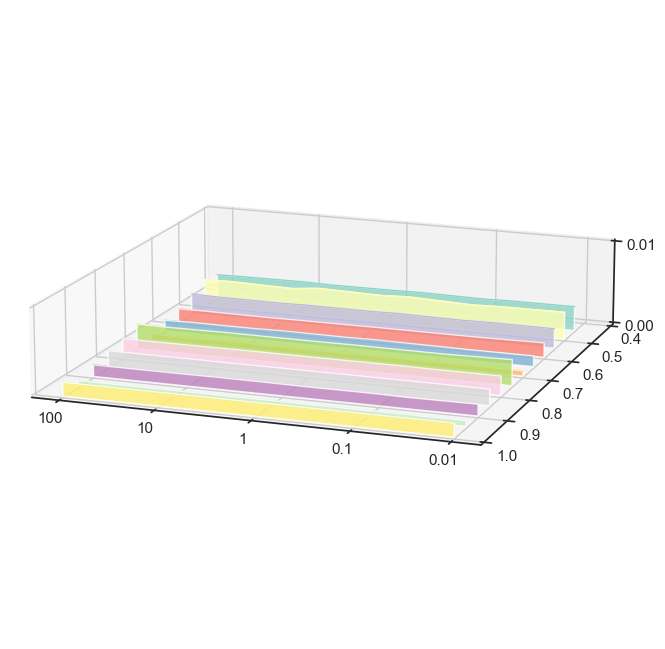

In [25]:
fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': '3d'},
                       gridspec_kw=dict(top=1.07, bottom=0.02, left=0, right=1))
plt.rcParams['font.family'] = 'Arial'
ax.view_init(elev=15, azim=110)
overlay_ratio_set = np.arange(0.3, 1.05, 0.05)
overlay_ratio_set = overlay_ratio_set[3:]
Ba_set = np.array([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100])
Bb_set = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

verts = []
facecolors = plt.colormaps['Set3'](np.linspace(0, 1, len(overlay_ratio_set)))
orders = [0,0,0,0,0,0,0,0,0,0,0,0]
for i, overlay_ratio in enumerate(overlay_ratio_set):
    results = np.load(f'./results/parameters_studies_results/BaBb_{overlay_ratio}.npy', allow_pickle=True).item()
    maes = np.array(results['maes'][:9])
    verts.append(polygon_under_graph(np.log(Ba_set), maes))
    ax.plot(np.log(Ba_set), np.ones(Ba_set.shape) * overlay_ratio, maes, color=facecolors[i], zorder=len(overlay_ratio_set)-i-8+orders[i], lw=1)
poly = PolyCollection(verts, facecolors=facecolors, alpha=0.8)
ax.add_collection3d(poly, zs=overlay_ratio_set, zdir='y')

# ax.set_xlabel('Ba / Bb')
# ax.set_ylabel('Overlap ratio')
# ax.set_zlabel('MAE')
ax.set_xticks(np.log(np.array([0.01, 0.1,1, 10, 100])))
ax.set_xticklabels(['0.01', '0.1', '1', '10', '100'])
ax.set_zlim([0,0.01])
ax.set_ylim([0.4,1])
ax.set_zticks([0, 0.01])
ax.set_zlabel('')
ax.set_box_aspect([10,10,2])

plt.savefig('./figures/Parameters_studies/BaBb.pdf', transparent=True)

In [76]:
results['maes']

[0.001562827782727835,
 0.0015737732857072024,
 0.001569783950696836,
 0.00157871889784728,
 0.0015711939704658102,
 0.0015783269408846468,
 0.0015793760257616256,
 0.0015748525467631227,
 0.0015739628324396922,
 0.0015653330136840417,
 0.0015859443425162469,
 0.0015678011416401635,
 0.0015760312088135945,
 0.0015862593526685365,
 0.001565921820213945,
 0.0015668636783340534,
 0.0015710905142239558,
 0.0015655661029758707]

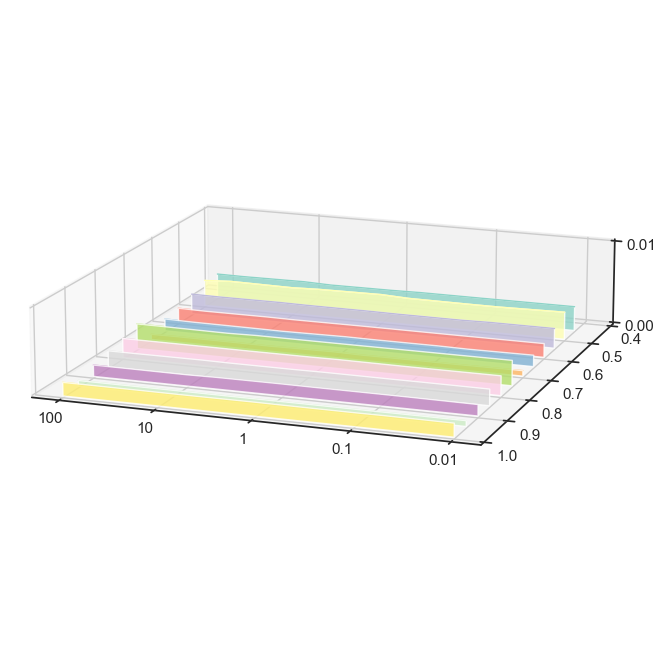

In [75]:
fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': '3d'},
                       gridspec_kw=dict(top=1.07, bottom=0.02, left=0, right=1))
plt.rcParams['font.family'] = 'Arial'
ax.view_init(elev=15, azim=110)
overlay_ratio_set = np.arange(0.3, 1.05, 0.05)
overlay_ratio_set = overlay_ratio_set[3:]
Ba_set = np.array([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100])
Bb_set = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

verts = []
facecolors = plt.colormaps['Set3'](np.linspace(0, 1, len(overlay_ratio_set)))
orders = [0,0,0,0,0,0,0,0,0,0,0,0]
for i, overlay_ratio in enumerate(overlay_ratio_set):
    results = np.load(f'./results/parameters_studies_results/BaBb_{overlay_ratio}.npy', allow_pickle=True).item()
    maes = np.array(results['maes'][9:])
    verts.append(polygon_under_graph(np.log(Ba_set), maes))
    ax.plot(np.log(Ba_set), np.ones(Ba_set.shape) * overlay_ratio, maes, color=facecolors[i], zorder=len(overlay_ratio_set)-i-8+orders[i], lw=1)
poly = PolyCollection(verts, facecolors=facecolors, alpha=0.8)
ax.add_collection3d(poly, zs=overlay_ratio_set, zdir='y')

# ax.set_xlabel('Ba / Bb^-1')
# ax.set_ylabel('Overlap ratio')
# ax.set_zlabel('MAE')
ax.set_xticks(np.log(np.array([0.01, 0.1,1, 10, 100])))
ax.set_xticklabels(['0.01', '0.1', '1', '10', '100'])
ax.set_zlim([0,0.01])
ax.set_ylim([0.4,1])
ax.set_zticks([0, 0.01])
ax.set_zlabel('')
ax.set_box_aspect([10,10,2])

# plt.savefig('./figures/Parameters_studies/BaBb_2.pdf', transparent=True)

In [4]:
# parameter K

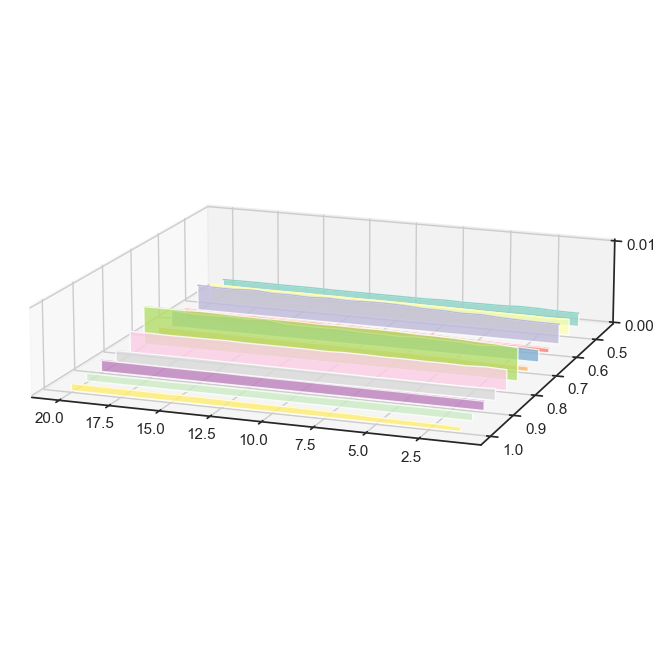

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 创建一个 3D 图形对象
fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': '3d'},
                       gridspec_kw=dict(top=1.07, bottom=0.02, left=0, right=1))
ax.view_init(elev=15, azim=110)
plt.rcParams['font.family'] = 'Arial'
# 生成数据
# x = np.linspace(0, 10, 100)
# overlay_ratio_set = np.linspace(0.1, 1, 10)
overlay_ratio_set = np.arange(0.1, 1.1, 0.1)
overlay_ratio_set = overlay_ratio_set[3:]
overlay_ratio_set = np.arange(0.3, 1.05, 0.05)
overlay_ratio_set = overlay_ratio_set[3:]
# y_offsets = np.linspace(0, 10, 5)
# z = np.sin(x)

# 绘制多个2D曲线沿着Y轴排列
# for overlay_ratio in overlay_ratio_set:
#     results = np.load(f'./results/K_{overlay_ratio}.npy', allow_pickle=True).item()
#     K_set = results['K_set']
#     maes = results['maes']
#     ax.plot(K_set, np.ones(K_set.shape) * overlay_ratio, maes)


verts = []
facecolors = plt.colormaps['Set3'](np.linspace(0, 1, len(overlay_ratio_set)))
# for i, overlay_ratio in enumerate(np.flip(overlay_ratio_set)):
orders = [0,0,0,0,0,0,0,0,0,0,0,0]
for i, overlay_ratio in enumerate(overlay_ratio_set):
    results = np.load(f'./results/parameters_studies_results/K_{overlay_ratio}.npy', allow_pickle=True).item()
    K_set = results['K_set']
    maes = results['maes']
    verts.append(polygon_under_graph(K_set, maes))
    ax.plot(K_set, np.ones(K_set.shape) * overlay_ratio, maes, color=facecolors[i], zorder=len(overlay_ratio_set)-i-8+orders[i], lw=1)
    # poly = PolyCollection(vert, facecolors=[facecolors[i]], alpha=1,zorder=2*len(overlay_ratio_set)-i+1000)
    # ax.plot(np.log(kappa_set), np.ones(kappa_set.shape) * overlay_ratio, maes, color=facecolors[i],zorder=2*len(overlay_ratio_set)-i)
    # poly = PolyCollection(vert, facecolors=[facecolors[i]], alpha=1)
    # ax.add_collection3d(poly, zs=overlay_ratio, zdir='y')
poly = PolyCollection(verts, facecolors=facecolors, alpha=0.8)
ax.add_collection3d(poly, zs=overlay_ratio_set, zdir='y')

# # 设置标签和标题
# ax.set_xlabel('K')
# ax.set_ylabel('Overlap ratio')
# ax.set_zlabel('MAE')
# # ax.set_title('Multiple 2D Plots in 3D Space')
# # ax.set_xscale('log')
# # 显示图形
# plt.show()

# ax.set_xlabel('K')
# ax.set_ylabel('Overlap ratio')
# ax.set_zlabel('MAE')
# ax.set_xticks(np.log(np.array([0.01, 0.1,1, 10, 100])))
# ax.set_xticklabels(['0.01', '0.1', '1', '10', '100'])
# ax.set_zlim([0,0.2])
# ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2])
ax.set_zlim([0,0.01])
ax.set_zlabel('')
# ax.set_title('Multiple 2D Plots in 3D Space')
# ax.set_xscale('log')
ax.set_zticks([0, 0.01])
ax.set_zlabel('')
ax.set_box_aspect([10,10,2])
plt.savefig('./figures/Parameters_studies/K.pdf', transparent=True)


In [13]:
# lambda

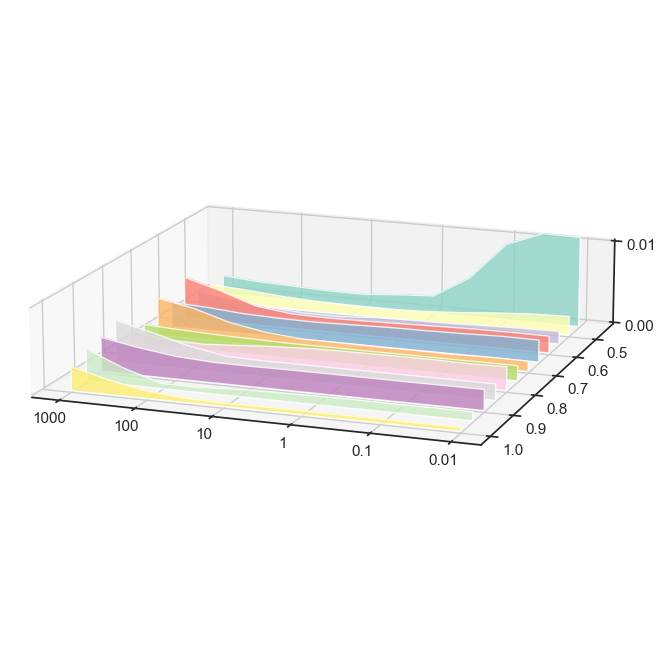

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
sns.set_theme(style='ticks')
plt.rcParams['font.family'] = 'Arial'

# 创建一个 3D 图形对象
fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': '3d'},
                       gridspec_kw=dict(top=1.07, bottom=0.02, left=0, right=1))
ax.view_init(elev=15, azim=110)

# 生成数据
# x = np.linspace(0, 10, 100)
# overlay_ratio_set = np.linspace(0.1, 1, 10)
overlay_ratio_set = np.arange(0.1, 1.1, 0.1)
overlay_ratio_set = overlay_ratio_set[3:]
overlay_ratio_set = np.arange(0.3, 1.05, 0.05)
overlay_ratio_set = overlay_ratio_set[3:]
# y_offsets = np.linspace(0, 10, 5)
# z = np.sin(x)

# 绘制多个2D曲线沿着Y轴排列
# for overlay_ratio in overlay_ratio_set:
#     results = np.load(f'./results/lambda_{overlay_ratio}.npy', allow_pickle=True).item()
#     lambda_set = results['lambda_set']
#     maes = results['maes']
#     ax.plot(np.log(lambda_set), np.full_like(lambda_set, overlay_ratio), maes)


verts = []
facecolors = plt.colormaps['Set3'](np.linspace(0, 1, len(overlay_ratio_set)))
# for i, overlay_ratio in enumerate(np.flip(overlay_ratio_set)):
orders = [0,0,0,0,0,0,0,0,0,0,0,0]
for i, overlay_ratio in enumerate(overlay_ratio_set):
    results = np.load(f'./results/parameters_studies_results/lambda_{overlay_ratio}.npy', allow_pickle=True).item()
    lambda_set = results['lambda_set']
    maes = results['maes']
    verts.append(polygon_under_graph(np.log(lambda_set), maes))
    ax.plot(np.log(lambda_set), np.ones(lambda_set.shape) * overlay_ratio, maes, color=facecolors[i], zorder=len(overlay_ratio_set)-i-12, lw=1)
    # poly = PolyCollection(vert, facecolors=[facecolors[i]], alpha=1,zorder=2*len(overlay_ratio_set)-i+1000)
    # ax.plot(np.log(kappa_set), np.ones(kappa_set.shape) * overlay_ratio, maes, color=facecolors[i],zorder=2*len(overlay_ratio_set)-i)
    # poly = PolyCollection(vert, facecolors=[facecolors[i]], alpha=1)
    # ax.add_collection3d(poly, zs=overlay_ratio, zdir='y')
poly = PolyCollection(verts, facecolors=facecolors, alpha=0.8)
ax.add_collection3d(poly, zs=overlay_ratio_set, zdir='y')

# # 设置标签和标题
# ax.set_xlabel('lambda')
# ax.set_ylabel('Overlap ratio')
# ax.set_zlabel('MAE')
# # ax.set_title('Multiple 2D Plots in 3D Space')
# # ax.set_xscale('log')
# # 显示图形
# plt.show()

# ax.set_xlabel('lambda')
# ax.set_ylabel('Overlap ratio')
# ax.set_zlabel('MAE')
ax.set_xticks(np.log(np.array([0.01, 0.1,1, 10, 100, 1000])))
ax.set_xticklabels(['0.01', '0.1', '1', '10', '100', '1000'])
ax.set_zlim([0,0.01])
# ax.set_zticks([0, 0.01])
# ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2])
ax.set_zlabel('')
ax.set_zticks([0, 0.01])
ax.set_zlabel('')
ax.set_box_aspect([10,10,2])
# ax.set_title('Multiple 2D Plots in 3D Space')
# ax.set_xscale('log')
plt.savefig('./figures/Parameters_studies/lambda.pdf', transparent=True)
# 

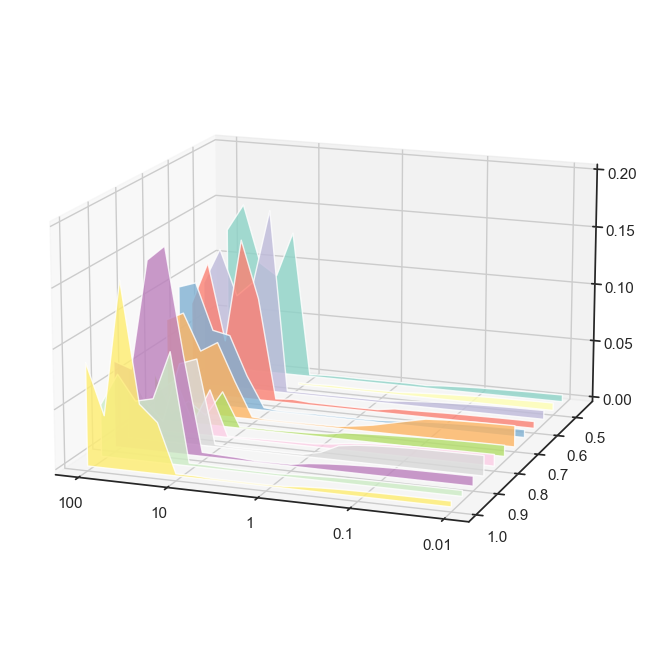

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': '3d'},
                       gridspec_kw=dict(top=1.07, bottom=0.02, left=0, right=1))
ax.view_init(elev=15, azim=110)
plt.rcParams['font.family'] = 'Arial'

overlay_ratio_set = np.arange(0.3, 1.05, 0.05)
overlay_ratio_set = overlay_ratio_set[3:]
Ba_set = np.array([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100])
Bb_set = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

# 绘制多个2D曲线沿着Y轴排列
verts = []
facecolors = plt.colormaps['Set3'](np.linspace(0, 1, len(overlay_ratio_set)))
# for i, overlay_ratio in enumerate(np.flip(overlay_ratio_set)):
orders = [0,0,0,0,0,0,0,0,0,0,0,0]
for i, overlay_ratio in enumerate(overlay_ratio_set):
    results = np.load(f'./results/parameters_studies_results/kappa_{overlay_ratio}.npy', allow_pickle=True).item()
    kappa_set = np.array(results['kappa_set'])
    maes = np.array(results['maes'])
    inliers = np.where(np.array(maes) < 0.2)[0]
    kappa_set = kappa_set[inliers]
    maes = maes[inliers]
    verts.append(polygon_under_graph(np.log(kappa_set), maes))
    # ax.plot(np.log(kappa_set), np.ones(kappa_set.shape) * overlay_ratio, maes, color=facecolors[i], zorder=2*i+orders[i], lw=1)
poly = PolyCollection(verts, facecolors=facecolors, alpha=0.8)
ax.add_collection3d(poly, zs=overlay_ratio_set, zdir='y')
ax.set_xticks(np.log(np.array([100, 10,1, 0.1, 0.01])))
# ax.set_xticks(np.log(np.array([0.01, 0.1,1, 10, 100])))
ax.set_xticklabels(['0.01', '0.1', '1', '10', '100'])
ax.set_xlim([5,-5])
ax.set_zlim([0,0.2])
ax.set_ylim([0.42, 1.02])
ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2])
ax.set_zlabel('')
ax.set_box_aspect([10,10,6])
plt.savefig('./figures/Parameters_studies/kappa.pdf', transparent=True, bbox_inches='tight')

In [39]:
np.log(np.array([100, 10,1, 0.1, 0.01]))

array([ 4.60517019,  2.30258509,  0.        , -2.30258509, -4.60517019])

# Other methods

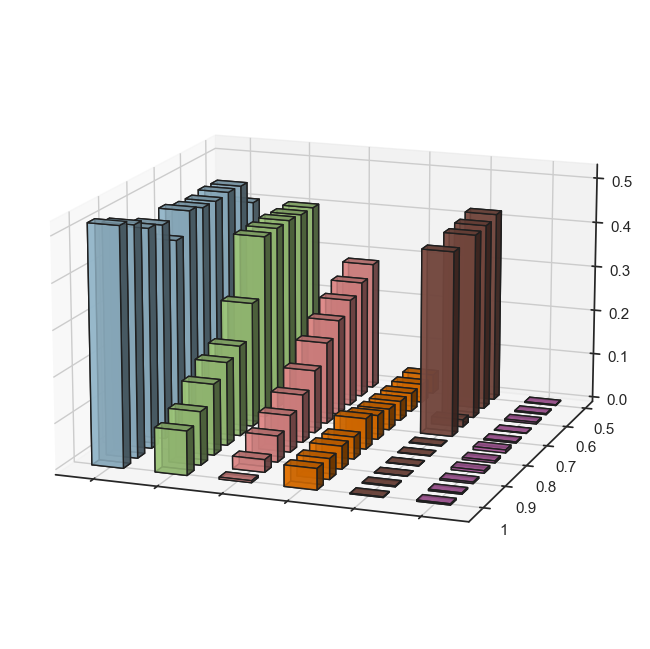

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# methods = ['Spateo', 'Moscot', 'SLAT', 'PASTE','STAlign']
methods = ['PASTE', 'Moscot', 'SLAT','STAlign', 'SPACEL','Spateo']

fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': '3d'},
                       gridspec_kw=dict(top=1.07, bottom=0.02, left=0, right=1))
ax.view_init(elev=15, azim=-70)
plt.rcParams['font.family'] = 'Arial'

# Construct arrays for the anchor positions of the 16 bars.
overlay_ratio_set = np.arange(0.5, 1.05, 0.05)
xpos, ypos = np.meshgrid(np.arange(len(methods))-0.2, overlay_ratio_set, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# # Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.025 * np.ones_like(zpos)
dx = 0.5 * np.ones_like(zpos)
dy = 0.025 * np.ones_like(zpos)
dzs = []
for i, method in enumerate(methods):
    results = np.load(f'./results/parameters_studies_other_methods/{method}_different_overlap.npy', allow_pickle=True).item()
    dz = np.array(results['maes']).ravel()
    dz = np.flip(dz)
    dzs.append(dz)
dzs = np.hstack(dzs)
# for i, method in enumerate(methods):
#     results = np.load(f'./results/{method}_different_overlap.npy', allow_pickle=True).item()
#     dz = np.array(results['maes']).ravel()
#     dz = np.flip(dz)
#     ax.bar3d(xpos + i * 0.05, ypos, zpos, dx, dy, dz, zsort='average', alpha=0.8, edgecolors = 'k', zorder=i+1)
# colors = sns.color_palette('tab20b')[17] * len(overlay_ratio_set) + sns.color_palette('tab20b')[18] * len(overlay_ratio_set) + sns.color_palette('tab20b')[19] * len(overlay_ratio_set) + sns.color_palette('tab20b')[20] * len(overlay_ratio_set) + sns.color_palette('tab20b')[21] * len(overlay_ratio_set)
color_for_each_method = [
    sns.color_palette('Paired')[0], # PASTE
    sns.color_palette('Paired')[2],  # Moscot
    sns.color_palette('Paired')[4], # SLAT
    sns.color_palette('Paired')[7],  # STAlign
    sns.color_palette('tab20')[10],  # SPACEL
    sns.color_palette('tab20b')[18], # Spateo
]
colors = np.concatenate([[np.array(c) for _ in range(len(overlay_ratio_set))] for c in color_for_each_method], axis=0)
ax.bar3d(xpos, ypos, zpos, dx, dy, dzs, zsort='average', alpha=0.8, edgecolors = np.array([31,31,31])/255, color = colors)
ax.set_xticks([0,1,2,3,4, 5]);
# ax.set_xticklabels(methods);
ax.set_xticklabels([]);
ax.set_yticks(np.array([0.5,0.6,0.7,0.8,0.9,1]) + 0.025);
ax.set_yticklabels([1, 0.9, 0.8, 0.7, 0.6, 0.5]);
ax.set_box_aspect([10,10,6])
plt.savefig('./figures/Parameters_studies/other_method.pdf', transparent=True, bbox_inches='tight')